<a href="https://colab.research.google.com/github/rafavidal1709/mack_ai/blob/main/Estrutura_do_Perceptron_e_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward e backward propagation no peceptron simples utilizando Numpy

Forward propagation como multiplicação de matrizes

y = X ⋅ wT + b

In [ ]:
import numpy as np

X = np.array([0.3, -0.2, 1.3])  # Entradas
w = np.array([0.1, -0.2, 0.3])  # Pesos
b = np.array([2.1])             # Bias ou viéses

y_pred = np.dot(X, w.T) + b # Forward propagation (previsão)

print("Predição:", y_pred)

Predição: [2.56]


1. Função de Ativação: Como você não especificou uma função de ativação, vamos usar uma função de ativação linear simples, ou seja, a saída yy será diretamente z=X⋅wT+bz=X⋅wT+b. Se você estiver usando uma função de ativação diferente, como a função sigmoidal, precisaremos incluir sua derivada.

2. Função de Erro: Vamos usar o erro quadrático E = 0.5 ⋅ ( y − y' ) ^2

3. Gradiente do Erro: Calcularemos os gradientes em relação aos pesos ww e ao bias bb.

In [ ]:
y_real = np.array([1.5])          # Valor real da saída (ground truth)

for i in range(100):  # Número de épocas para treinamento
  error = 0.5 * (y_real - y_pred)**2  # Função de erro (MSE simplificada para um exemplo)

  # Como estamos usando uma função de ativação linear, a derivada da função de ativação f'(z) é 1.
  # Portanto, a derivada de y_pred com relação a z é 1, então:

  dE_dy = -(y_real - y_pred)   # Derivada da função de erro em relação à saída prevista (y_pred)
  dE_dw = dE_dy * X   # Gradiente do erro em relação aos pesos
  dE_db = dE_dy * 1  # Gradiente do erro em relação ao bias: como b é somado diretamente, o gradiente em relação a b é dE_dy

  # Atualização dos pesos e do bias (usando taxa de aprendizado eta)

  eta = 0.01  # Taxa de aprendizado
  w = w - eta * dE_dw # Atualização dos pesos
  b = b - eta * dE_db # Atualização do bias

  y_pred = np.dot(X, w.T) + b # Forward propagation (previsão)

# Resultados
print("Pesos atualizados:", w)
print("Bias atualizado:", b)
print("Erro:", error)
print("Nova predição:", y_pred)

Pesos atualizados: [-0.01274541 -0.1248364  -0.18856343]
Bias atualizado: [1.72418198]
Erro: [1.97568895e-08]
Nova predição: [1.50019318]


O código é válido para uma função de ativação linear, onde a derivada da função de ativação é igual a 1.

No entanto, se você usar uma função de ativação não linear, como ReLU, sigmoid, tanh, ou qualquer outra, você precisará incluir a derivada da função de ativação no cálculo do backward propagation.

# Problemas de classificação

Problema linearmente separável:

In [ ]:
from sklearn.datasets import make_blobs

# Gerar pontos com make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)


Problema XOR:

In [ ]:
from sklearn.datasets import make_blobs

# Gerar 4 clusters de pontos ao redor do centro (0, 0) com make_blobs
X, _ = make_blobs(n_samples=200, centers=[[-1, -1], [-1, 1], [1, -1], [1, 1]], cluster_std=0.5, random_state=42)

y = np.zeros(X.shape[0])  # Inicializar todas as classes como 0
y[(X[:, 0] * X[:, 1]) < 0] = 1  # Atribuir classe 1 onde x1 * x2 < 0 (regra XOR)

O Moons:

In [ ]:
from sklearn.datasets import make_moons

# Gerar pontos com make_blobs
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# O perceptron no Pytorch resolvendo um problema linear

Criando o Perceptron:

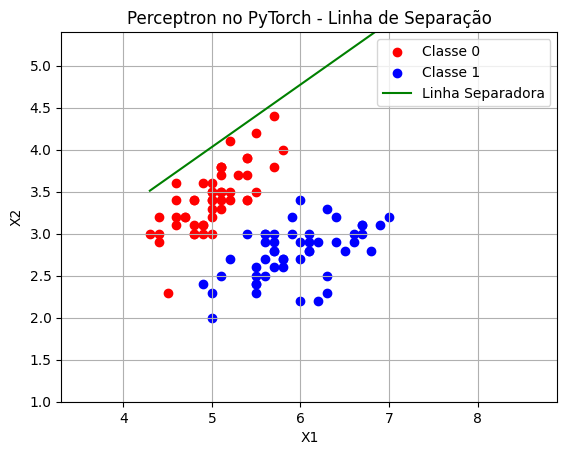

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Converter X e y para tensores do PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Necessário para ajuste de dimensões

# Definir o modelo do Perceptron
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(2, 1)  # 2 entradas (X1, X2) e 1 saída (classificação)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Usar a função de ativação sigmoide

# Instanciar o modelo
model = Perceptron()

def plotar_linha_de_decisao():
  # Plotar os pontos com cores diferentes
  plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classe 0')
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe 1')

  # Coeficientes da linha de separação (a partir dos pesos treinados)
  with torch.no_grad():
      w = model.linear.weight[0].numpy()  # Pesos [w1, w2]
      b = model.linear.bias.numpy()  # Bias

  # Equação da linha de decisão: w1*x1 + w2*x2 + b = 0  -> x2 = -(w1/w2)*x1 - (b/w2)
  x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
  y_values = -(w[0] / w[1]) * x_values - (b / w[1])

  # Plotar a linha de separação
  plt.plot(x_values, y_values, color='green', label='Linha Separadora')

  # Definir os limites dos eixos com base nos dados gerados pelo make_blobs
  plt.xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)  # Limitar eixo x com margem de 1 unidade
  plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)  # Limitar eixo y com margem de 1 unidade

  # Adicionar rótulos e legenda
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title('Perceptron no PyTorch - Linha de Separação')
  plt.legend()
  plt.grid(True)

  # Mostrar o gráfico
  plt.show()

plotar_linha_de_decisao()

Treinando o Perceptron:

Epoch [100/1000], Loss: 0.6924
Epoch [200/1000], Loss: 0.6924
Epoch [300/1000], Loss: 0.6924
Epoch [400/1000], Loss: 0.6924
Epoch [500/1000], Loss: 0.6924
Epoch [600/1000], Loss: 0.6924
Epoch [700/1000], Loss: 0.6924
Epoch [800/1000], Loss: 0.6924
Epoch [900/1000], Loss: 0.6924
Epoch [1000/1000], Loss: 0.6924


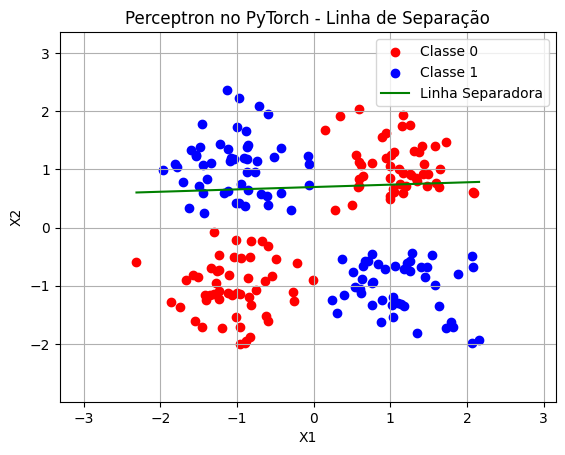

In [ ]:
# Definir o otimizador e a função de perda
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Otimizador Adam com taxa de aprendizado de 0.01
criterion = nn.BCELoss()  # Perda binária por entropia cruzada

# Treinamento do Perceptron
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)

    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Imprimir o progresso
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

plotar_linha_de_decisao() # Visualização dos dados e da linha de separação

# Resolvendo problemas não-lineares com MLP (Multi-Layer Perceptron)

Criando o MLP:

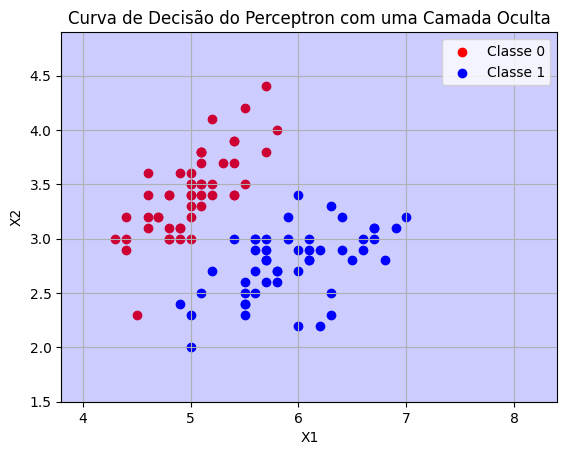

In [6]:
# Converter X e y para tensores do PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Necessário para ajuste de dimensões

# Definir o modelo do Perceptron
class MLP(nn.Module):
    def __init__(self, entradas=2, ocultas=16, saidas=1):
        super(MLP, self).__init__()
        # Usando nn.Sequential para organizar as camadas
        self.layers = nn.Sequential(
            nn.Linear(entradas, ocultas),  # Primeira camada com 2 entradas (neurônios)
            nn.ReLU(),        # Função de ativação ReLU
            nn.Linear(ocultas, saidas),  # Segunda camada
            nn.Sigmoid()      # Função de ativação Sigmoide para a saída final (0 ou 1)
        )

    def forward(self, x):
        return self.layers(x)  # Passar os dados através das camadas definidas

# Instanciar o modelo
model = MLP()

def plotar_curva_de_decisao():
  # Plotar os pontos de dados
  plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classe 0')
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe 1')

  # Gerar uma grade de pontos para cobrir todo o espaço das features
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Converter a grade de pontos em um tensor do PyTorch
  grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

  # Fazer previsões para todos os pontos da grade
  with torch.no_grad():
      Z = model(grid)
      Z = Z.reshape(xx.shape)

  # Plotar a curva de decisão
  plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['red', 'blue'])

  # Adicionar rótulos e legenda
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title('Curva de Decisão do Perceptron com uma Camada Oculta')
  plt.legend()
  plt.grid(True)

  # Mostrar o gráfico
  plt.show()

plotar_curva_de_decisao()

Treinando o MLP

Epoch [100/1000], Loss: 0.0603
Epoch [200/1000], Loss: 0.0243
Epoch [300/1000], Loss: 0.0149
Epoch [400/1000], Loss: 0.0104
Epoch [500/1000], Loss: 0.0076
Epoch [600/1000], Loss: 0.0058
Epoch [700/1000], Loss: 0.0046
Epoch [800/1000], Loss: 0.0036
Epoch [900/1000], Loss: 0.0029
Epoch [1000/1000], Loss: 0.0024


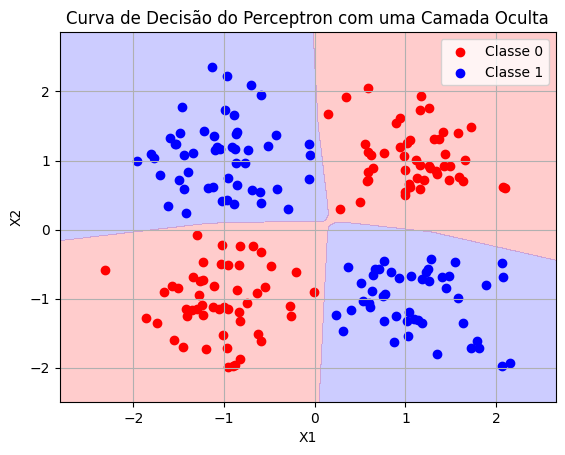

In [ ]:
# Definir o otimizador e a função de perda
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam é um algoritmo de otimização adaptativa
criterion = nn.BCELoss()  # Perda binária por entropia cruzada

# Treinamento do modelo
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)

    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Opcional: Imprimir o progresso a cada 100 épocas
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

plotar_curva_de_decisao()

# Problemas do mundo real: Iris

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar o dataset Iris
iris = load_iris()

# Separar as características (X) e os rótulos (y)
X = iris.data
y = iris.target

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar as características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converter os dados para tensores do PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Criar um Dataset personalizado para o PyTorch
class IrisDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Criar datasets para treino e teste
train_dataset = IrisDataset(X_train_tensor, y_train_tensor)
test_dataset = IrisDataset(X_test_tensor, y_test_tensor)

# Criar dataloaders para os datasets
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Exemplo de como usar o DataLoader
for inputs, labels in train_loader:
    print("Inputs: ", inputs)
    print("Labels: ", labels)
    break


Inputs:  tensor([[-0.2550, -0.5851,  0.6724,  1.0901],
        [ 1.0859,  0.5329,  1.1308,  1.7576],
        [-0.9863,  0.7565, -1.2760, -1.3126],
        [-0.8645,  0.5329, -1.1614, -0.9121],
        [ 1.6954, -0.1379,  1.1881,  0.5562],
        [ 0.5983,  0.5329,  1.3027,  1.7576],
        [ 0.3545, -0.1379,  0.5005,  0.2892],
        [ 2.1830, -0.1379,  1.6466,  1.2236],
        [ 0.4764,  0.7565,  0.9589,  1.4906],
        [-0.3769, -1.2558,  0.1566,  0.1557],
        [-1.7177, -0.1379, -1.3906, -1.3126],
        [ 0.7202, -0.8086,  0.9016,  0.9566],
        [ 2.3049,  1.6508,  1.7039,  1.3571],
        [ 1.5735, -0.1379,  1.2454,  1.2236],
        [ 0.8421, -0.1379,  0.8443,  1.0901],
        [ 0.2326, -1.9266,  0.1566, -0.2447]])
Labels:  tensor([2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1])


In [2]:
# Número de variáveis de entrada e classes de saída
num_input_vars = X_train_tensor.shape[1]  # Número de variáveis de entrada (features)
num_output_classes = len(torch.unique(y_train_tensor))  # Número de classes de saída

# Print das informações
print(f"Número de variáveis de entrada: {num_input_vars}")
print(f"Número de classes de saída: {num_output_classes}")

Número de variáveis de entrada: 4
Número de classes de saída: 3


In [19]:
model = MLP(entradas=num_input_vars, ocultas=32, saidas=num_output_classes) # Instanciar o modelo

# Definir o otimizador e a função de perda
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)  # Algoritmo de otimização Adam
criterion = nn.CrossEntropyLoss()  # Perda por entropia cruzada para problemas multiclasse

In [20]:
# Treinamento do modelo
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train_tensor)  # X_train_tensor é o tensor de características de treinamento
    loss = criterion(y_pred, y_train_tensor)  # y_train_tensor é o tensor dos rótulos

    # Backward pass e otimização
    optimizer.zero_grad()  # Zerar os gradientes acumulados
    loss.backward()        # Backpropagation para calcular os gradientes
    optimizer.step()       # Atualizar os pesos do modelo

    # Opcional: Imprimir o progresso a cada 100 épocas
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.5916
Epoch [200/1000], Loss: 0.5750
Epoch [300/1000], Loss: 0.5719
Epoch [400/1000], Loss: 0.5692
Epoch [500/1000], Loss: 0.5664
Epoch [600/1000], Loss: 0.5649
Epoch [700/1000], Loss: 0.5643
Epoch [800/1000], Loss: 0.5640
Epoch [900/1000], Loss: 0.5638
Epoch [1000/1000], Loss: 0.5638


Matriz de Confusão:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


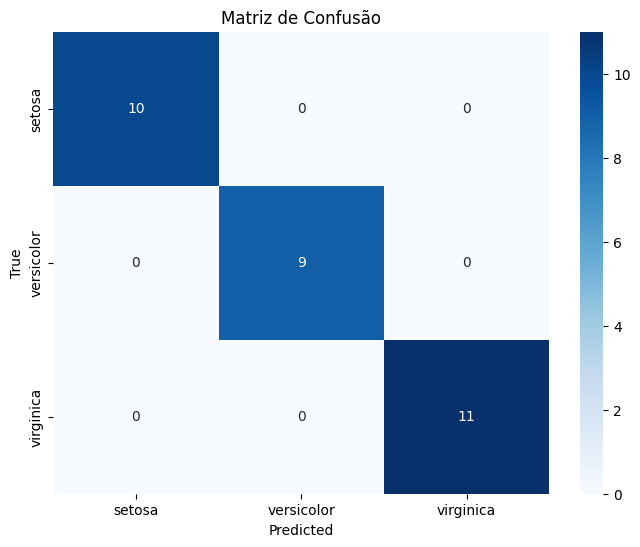

In [21]:
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Colocar o modelo em modo de avaliação
model.eval()

# Realizar previsões no conjunto de teste
with torch.no_grad():  # Desabilitar o cálculo de gradientes durante a inferência
    y_test_pred = model(X_test_tensor)  # Previsões no conjunto de teste
    _, y_test_pred_classes = torch.max(y_test_pred, 1)  # Pegar a classe com maior pontuação (logits)

# Converter tensores para numpy para usar na função de matriz de confusão
y_test_pred_classes = y_test_pred_classes.numpy()
y_test_true = y_test_tensor.numpy()

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test_true, y_test_pred_classes)

# Imprimir a matriz de confusão
print("Matriz de Confusão:")
print(conf_matrix)

# Opcional: Visualizar a matriz de confusão como um gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()
